In [30]:
import numpy as np
from array import array
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [31]:
dirin='/home/rdavis39/CLIM470/CLIM-470-Numerical-Weather-Prediction/Project/'
zDfil='lowgeopot.dat'
uDfil='lowuwind.dat'
vDfil='lowvwind.dat'
topo_file = "lowtopo.dat"

In [32]:
ntime=3
nx=13
ny=5
recl=(nx*ny)*4
z_bin=np.zeros((ntime,nx,ny))
u_bin=np.zeros((ntime,nx,ny))
v_bin=np.zeros((ntime,nx,ny))
topo_bin=np.zeros((ny,nx))

In [33]:
ds_topo_bin = open(dirin+topo_file,'rb')

tmp = ds_topo_bin.read(recl)
tmp1 = array('f',tmp)
#tmp2=tmp1[1:-1] #for fortran sequential
ds_topo_bin=np.reshape(tmp1,(ny,nx))

In [34]:
ds_z_bin = open(dirin+zDfil,'rb')
for t in range(ntime):
    tmp = ds_z_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    z_bin[t,:,:]=np.reshape(tmp1,(nx,ny))
del ds_z_bin,tmp,tmp1

In [35]:
ds_u_bin = open(dirin+uDfil,'rb')
for t in range(ntime):
    tmp = ds_u_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    u_bin[t,:,:]=np.reshape(tmp1,(nx,ny))
del ds_u_bin,tmp,tmp1

In [36]:
ds_v_bin = open(dirin+vDfil,'rb')
for t in range(ntime):
    tmp = ds_v_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    v_bin[t,:,:]=np.reshape(tmp1,(nx,ny))
del ds_v_bin,tmp,tmp1

In [37]:
# calculate time mean
z_bin_mean = z_bin.mean(axis=0)
u_bin_mean = u_bin.mean(axis=0)
v_bin_mean = v_bin.mean(axis=0)

Text(0.5, 1.0, 'gh snapshot')

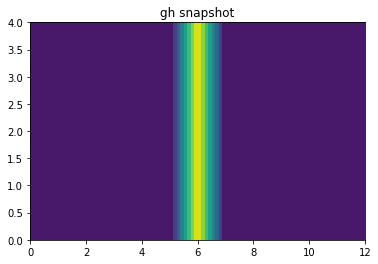

In [38]:
# plot one time 
fig, ax = plt.subplots()
zc = ax.contourf(ds_topo_bin)
ax.set_title('gh snapshot')

Text(0.5, 1.0, 'Time avg')

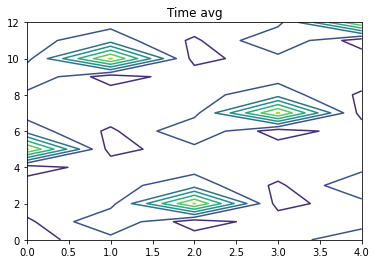

In [39]:
# plot the time average 
fig, ax = plt.subplots()
zc = ax.contour(z_bin_mean)
ax.set_title('Time avg')

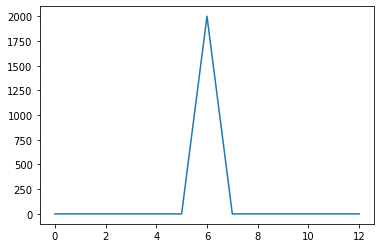

In [40]:
fig, ax = plt.subplots()
zc = ax.plot(ds_topo_bin[0,:])

Text(0.5, 1.0, 'gh snapshot')

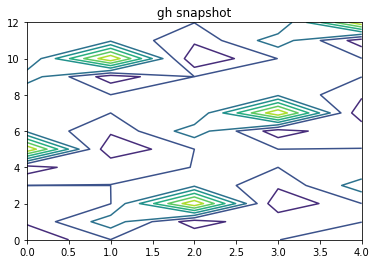

In [41]:
# plot one time 
fig, ax = plt.subplots()
zc = ax.contour(z_bin[-1,:,:])
ax.set_title('gh snapshot')

Text(0.5, 1.0, 'gh time mean')

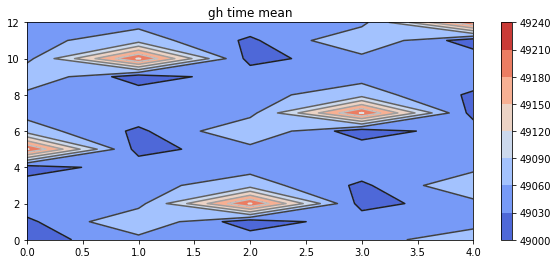

In [42]:
# plot filled contours
fig, ax = plt.subplots(figsize=(10,4))
zc = ax.contourf(z_bin_mean,cmap=cm.coolwarm)
plt.colorbar(zc)

# plot the contour lines using gray lines
zl = ax.contour(z_bin_mean,cmap=cm.gray)
ax.set_title('gh time mean')

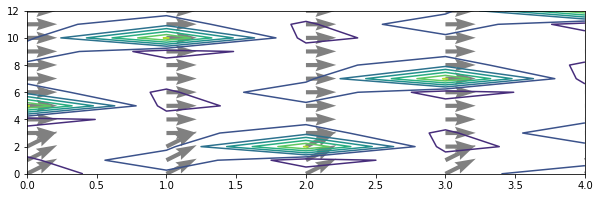

In [43]:
# Plot gh and wind vectors
fig, ax = plt.subplots(figsize=(10,3))
zc = ax.contour(z_bin_mean)
skip=(slice(None, None, 3), slice(None, None, 3))
x=np.arange(nx)
y=np.arange(ny)
zc = ax.quiver(u_bin_mean, v_bin_mean,color='grey')


In [44]:
u_bin_mean[:,:]

array([[19.93461291, 19.93188604, 19.93019422, 19.93019422, 19.93019485],
       [19.93019358, 19.92977842, 19.9301885 , 19.93061447, 19.93019485],
       [19.93019422, 19.93019422, 19.92852974, 19.93625259, 19.9349467 ],
       [19.93352191, 19.93352191, 19.93352254, 19.93352127, 19.93317604],
       [19.9335111 , 19.93387731, 19.93352254, 19.93352191, 19.93352191],
       [19.93213844, 19.93625259, 19.9349467 , 19.93352191, 19.93352191],
       [19.93352254, 19.93352127, 19.93317604, 19.9335111 , 19.93387731],
       [19.93352254, 19.93352191, 19.93352191, 19.93213844, 19.93625259],
       [19.9349467 , 19.93352191, 19.93352191, 19.93352254, 19.93352127],
       [19.93317604, 19.9335111 , 19.93387731, 19.93352254, 19.93352191],
       [19.93352191, 19.93213844, 19.93622462, 19.93486341, 19.93346596],
       [19.93346596, 19.93346659, 19.93346532, 19.93312073, 19.93346278],
       [19.93381437, 19.93346659, 19.93346596, 19.93346596, 19.93208249]])

In [45]:
v_bin_mean[:,:]

array([[9.93157978, 9.93684979, 9.93684979, 9.93684979, 9.93946285],
       [9.93382155, 9.94065431, 9.93347314, 9.93684851, 9.93684979],
       [9.93684979, 9.93685233, 9.95630983, 0.07536572, 0.08037039],
       [0.08037039, 0.08037228, 0.08036481, 0.07919989, 0.08249579],
       [0.07940693, 0.08036884, 0.08037039, 0.08037039, 0.0803798 ],
       [0.09367281, 0.07921679, 0.08339998, 0.08339998, 0.08340164],
       [0.083395  , 0.08236994, 0.08546667, 0.08236829, 0.08339831],
       [0.08339998, 0.08339998, 0.08340826, 0.09585827, 0.07924935],
       [0.08343254, 0.08343254, 0.0834342 , 0.08342756, 0.08240251],
       [0.08548648, 0.08240085, 0.08343088, 0.08343254, 0.08343254],
       [0.08344082, 0.09589083, 0.08200289, 0.08479025, 0.08479025],
       [0.0847919 , 0.08478582, 0.0837591 , 0.08651077, 0.08410474],
       [0.08478914, 0.08479025, 0.08479025, 0.08479853, 0.09586523]])